## Web Scraping of NY Times's Bestsellers of Nonfiction for Each Sunday of Every Month in 2020 (Part 2)

<h3>Unpickle The Data and Load The Data from The Flat File</h3>
<p>This data set is structured for [week][book][attributes].</p>

In [2]:
import pickle
#unpickle the data structure for use
filename = 'bestsellers'
infile = open(filename,'rb')
bestsellers = pickle.load(infile)
infile.close()
print(bestsellers)

[[['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '54', 'BECOMING', 'Michelle Obama', 'Crown', 'The former first lady describes how she balanced work, family and her husband’s political ascent.', '1', 'https://www.nytimes.com/books/best-sellers/2020/01/05/hardcover-nonfiction#QmVzdFNlbGxlckJvb2s6MTUyNDc2MzEzNi05NzgxNTI0NzYzMTM4', '3', 'December 21, 2019'], ['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '96', 'EDUCATED', 'Tara Westover', 'Random House', 'The daughter of survivalists, who is kept out of school, educates herself enough to leave home for university.', '2', 'https://www.nytimes.com/books/best-sellers/2020/01/05/hardcover-nonfiction#QmVzdFNlbGxlckJvb2s6MDM5OTU5MDUwMS05NzgwMzk5NTkwNTA0', '1', 'December 21, 2019'], ['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '10', 'ME', 'Elton John', 'Holt', 'The multi-award-winning solo artist&#x27;s first autobiography chronicles his career, relationships and private struggles.', '3', 'https://www.nytime

<h3>Check Whether "lady" Occurs The Same As "first lady"</h3>
<p>There are instances of "lady" and "first lady", both not being synonymous. In fact, both are quite distinct; therefore, we should find a way to distinguish the two so that Python does not confuse both tokens, "lady" and "first lady". We will treat "first lady" as a single token because it is clearly distinct from the token "lady".</p>

In [3]:
import re

print("check for 'lady'")
lady=0
weekly_lady = []
for m, i in enumerate(bestsellers):
    y=0
    for k, j in enumerate(i):
        print(f"book {k+1}:",j[10].count("lady")) # k would actually be the rank, not the book number
        lady = lady + j[10].count("lady")
        y = y + j[10].count("lady")
    weekly_lady.append(f"week {m+1}: {y}")
print(f"'lady' occurs {lady} times")

print("check for 'first lady'")
first_lady=0
weekly_lady2 = []
for m, i in enumerate(bestsellers):
    y=0
    for k, j in enumerate(i):
        print(f"book {k+1}:",j[10].count("first lady")) # k would actually be the rank, not the book number
        first_lady = first_lady + j[10].count("first lady")
        y = y + j[10].count("first lady")
    weekly_lady2.append(f"week {m+1}: {y}")
print(f"'first lady' occurs {first_lady} times")

print("Totals:")
print(f"'lady' occurs {lady} times")
print(f"'first lady' occurs {first_lady} times")

for i in range(len(weekly_lady)):
    print(weekly_lady[i],weekly_lady2[i])
    
# weeks 15 and 16 show that 'lady' occurs twice, whereas 'first lady' occurs once; therefore, 'lady' cannot be assumed synonymous as 'first lady' from the data.

check for 'lady'
book 1: 1
book 2: 0
book 3: 0
book 4: 0
book 5: 0
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 1
book 2: 0
book 3: 0
book 4: 0
book 5: 0
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 0
book 2: 0
book 3: 1
book 4: 0
book 5: 0
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 0
book 2: 0
book 3: 1
book 4: 0
book 5: 0
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 0
book 2: 0
book 3: 0
book 4: 1
book 5: 0
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 0
book 2: 0
book 3: 0
book 4: 0
book 5: 1
book 6: 0
book 7: 0
book 8: 0
book 9: 0
book 10: 0
book 11: 0
book 12: 0
book 13: 0
book 14: 0
book 15: 0
book 1: 0
book 2: 0
book 3: 0
book 4: 0
book 5:

<h3>Clean HTML Character Entities</h3>

In [4]:
import re

for i in bestsellers:
    for k in i:
        print(k[10]) # before check
        k[10] = re.sub(r"&#x27;", "\'", k[10]) # convert html code to an apostrophe
        k[10] = re.sub(r"&quot;", "\"", k[10]) # convert html code to an quotation mark
        k[10] = re.sub(r"&amp;", "&", k[10]) # convert html code to an ampersand
        k[10] = re.sub(r"first lady", "first_lady", k[10]) # make "first lady" a single token
        print(k[10]) # after check

The former first lady describes how she balanced work, family and her husband’s political ascent.
The former first_lady describes how she balanced work, family and her husband’s political ascent.
The daughter of survivalists, who is kept out of school, educates herself enough to leave home for university.
The daughter of survivalists, who is kept out of school, educates herself enough to leave home for university.
The multi-award-winning solo artist&#x27;s first autobiography chronicles his career, relationships and private struggles.
The multi-award-winning solo artist's first autobiography chronicles his career, relationships and private struggles.
Famous examples of miscommunication serve as the backdrop to explain potential conflicts and misunderstandings.
Famous examples of miscommunication serve as the backdrop to explain potential conflicts and misunderstandings.
The &quot;Fox &amp; Friends” host gives an account of the battle against the Mexican Army in 1836.
The "Fox & Friends

<h3>Create A List Containing A Corpus for Each Week A List Was Published for Nonfictional Best Sellers in 2020</h3>
<p>This corpus will be used for calculating the TF-IDF.</p>

In [5]:
weekly_corpus = []
for i in bestsellers:
    x = []
    for k in i:
        x.append(k[10])
    weekly_corpus.append(x)
print(weekly_corpus)

[['The former first_lady describes how she balanced work, family and her husband’s political ascent.', 'The daughter of survivalists, who is kept out of school, educates herself enough to leave home for university.', "The multi-award-winning solo artist's first autobiography chronicles his career, relationships and private struggles.", 'Famous examples of miscommunication serve as the backdrop to explain potential conflicts and misunderstandings.', 'The "Fox & Friends” host gives an account of the battle against the Mexican Army in 1836.', 'An owner’s manual of the human body covering various parts, functions and what happens when things go wrong.', 'A senior official in the Trump administration offers an assessment of the president and makes a moral appeal.', 'The humorist spotlights frequently unnoticed aspects of deceased celebrities and historical figures.', 'Forays into politics and views on liberals from the executive vice president of the Trump Organization.', 'Lessons learned b

<h3>Calculate the TF-IDF for The Synopsis for Each Book for A Given Week</h3>
<p>The algorithm for calculating the TF-IDF is calibrated for observing one instance of a token in each entry of the corpus. If the entry (i.e., a synopsis for a book) being compared to the corpus has more than one instance of a token, the score will decrease as more entries in the corpus contain an instance of that token. The less entries in a corpus that contains an instance of a token will increase the score of a token from the entry being compared and calculated from a synopsis of a book.</p> 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
def get_ifidf_for_words(text):
    tfidf_matrix= tfidf.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

In [8]:
weekly_keywords = []
for i in weekly_corpus:
    tfidf = TfidfVectorizer(min_df=1,stop_words='english') # count one instance of a token from each entry in the corpus and omit all stop words and punctuation
    tfidf.fit(i)
    feature_names = tfidf.get_feature_names()
    y = []
    for k in i:
        x = get_ifidf_for_words(k)
        y.append(x)
    weekly_keywords.append(y)
print(weekly_keywords)

[[{'ascent': 0.36495379193576294, 'balanced': 0.36495379193576294, 'describes': 0.3169009139386058, 'family': 0.3169009139386058, 'first_lady': 0.36495379193576294, 'husband': 0.36495379193576294, 'political': 0.36495379193576294, 'work': 0.36495379193576294}, {'daughter': 0.3535533905932738, 'educates': 0.3535533905932738, 'home': 0.3535533905932738, 'kept': 0.3535533905932738, 'leave': 0.3535533905932738, 'school': 0.3535533905932738, 'survivalists': 0.3535533905932738, 'university': 0.3535533905932738}, {'artist': 0.30151134457776363, 'autobiography': 0.30151134457776363, 'award': 0.30151134457776363, 'career': 0.30151134457776363, 'chronicles': 0.30151134457776363, 'multi': 0.30151134457776363, 'private': 0.30151134457776363, 'relationships': 0.30151134457776363, 'solo': 0.30151134457776363, 'struggles': 0.30151134457776363, 'winning': 0.30151134457776363}, {'backdrop': 0.33333333333333337, 'conflicts': 0.33333333333333337, 'examples': 0.33333333333333337, 'explain': 0.333333333333

<p>Check the structure of weekly keywords</p>

In [10]:
print(len(weekly_keywords),"weeks")
for i in range(len(weekly_keywords)):
    print(f"week {i+1}:",len(weekly_keywords[i]),"books")

52 weeks
week 1: 15 books
week 2: 15 books
week 3: 15 books
week 4: 15 books
week 5: 15 books
week 6: 15 books
week 7: 15 books
week 8: 15 books
week 9: 15 books
week 10: 15 books
week 11: 15 books
week 12: 15 books
week 13: 15 books
week 14: 15 books
week 15: 15 books
week 16: 15 books
week 17: 15 books
week 18: 15 books
week 19: 15 books
week 20: 15 books
week 21: 15 books
week 22: 15 books
week 23: 15 books
week 24: 15 books
week 25: 15 books
week 26: 15 books
week 27: 15 books
week 28: 15 books
week 29: 15 books
week 30: 15 books
week 31: 15 books
week 32: 15 books
week 33: 15 books
week 34: 15 books
week 35: 15 books
week 36: 15 books
week 37: 15 books
week 38: 15 books
week 39: 15 books
week 40: 15 books
week 41: 15 books
week 42: 15 books
week 43: 15 books
week 44: 15 books
week 45: 15 books
week 46: 15 books
week 47: 15 books
week 48: 15 books
week 49: 15 books
week 50: 15 books
week 51: 15 books
week 52: 15 books


<h3>Append Word Scores from TF-IDF Calculations for Each Book to That Book for A Given Week</h3>

In [12]:
for i in range(len(bestsellers)):
    #print("week",i)
    for k in range(len(bestsellers[i])):
        #print("book",k)
        bestsellers[i][k].append(weekly_keywords[i][k])
print(bestsellers)

[[['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '54', 'BECOMING', 'Michelle Obama', 'Crown', 'The former first_lady describes how she balanced work, family and her husband’s political ascent.', '1', 'https://www.nytimes.com/books/best-sellers/2020/01/05/hardcover-nonfiction#QmVzdFNlbGxlckJvb2s6MTUyNDc2MzEzNi05NzgxNTI0NzYzMTM4', '3', 'December 21, 2019', {'ascent': 0.36495379193576294, 'balanced': 0.36495379193576294, 'describes': 0.3169009139386058, 'family': 0.3169009139386058, 'first_lady': 0.36495379193576294, 'husband': 0.36495379193576294, 'political': 0.36495379193576294, 'work': 0.36495379193576294}, {'ascent': 0.36495379193576294, 'balanced': 0.36495379193576294, 'describes': 0.3169009139386058, 'family': 0.3169009139386058, 'first_lady': 0.36495379193576294, 'husband': 0.36495379193576294, 'political': 0.36495379193576294, 'work': 0.36495379193576294}], ['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '96', 'EDUCATED', 'Tara Westover', 'Random House', 'T

<h3>Extract The Data for The Book BECOMING</h3>

In [13]:
bestsellers_becoming = []
for i in bestsellers:
    for k in i:
        if k[7] == "BECOMING":
            bestsellers_becoming.append(k)
print(bestsellers_becoming) 

[['1-5-2020', 'January 5, 2020', 1, 'January', '5', '2020', '54', 'BECOMING', 'Michelle Obama', 'Crown', 'The former first_lady describes how she balanced work, family and her husband’s political ascent.', '1', 'https://www.nytimes.com/books/best-sellers/2020/01/05/hardcover-nonfiction#QmVzdFNlbGxlckJvb2s6MTUyNDc2MzEzNi05NzgxNTI0NzYzMTM4', '3', 'December 21, 2019', {'ascent': 0.36495379193576294, 'balanced': 0.36495379193576294, 'describes': 0.3169009139386058, 'family': 0.3169009139386058, 'first_lady': 0.36495379193576294, 'husband': 0.36495379193576294, 'political': 0.36495379193576294, 'work': 0.36495379193576294}, {'ascent': 0.36495379193576294, 'balanced': 0.36495379193576294, 'describes': 0.3169009139386058, 'family': 0.3169009139386058, 'first_lady': 0.36495379193576294, 'husband': 0.36495379193576294, 'political': 0.36495379193576294, 'work': 0.36495379193576294}], ['1-12-2020', 'January 12, 2020', 1, 'January', '12', '2020', '55', 'BECOMING', 'Michelle Obama', 'Crown', 'The f

<h3>Prepare Data for A Data Frame for The Book BECOMING.</h3>

In [14]:
becoming = []
for i in bestsellers_becoming:    
    x_keys = list(i[15].keys())
    x_values = list(i[15].values())
    #print(x_keys)
    #print(x_values)
    for k in range(len(x_keys)):
        #print(k)
        #print(x_keys[k])
        #print(x_values[k])
        x = []
        x.append(i[0])
        x.append(x_keys[k])
        x.append(x_values[k])
        becoming.append(x)
print(becoming)

[['1-5-2020', 'ascent', 0.36495379193576294], ['1-5-2020', 'balanced', 0.36495379193576294], ['1-5-2020', 'describes', 0.3169009139386058], ['1-5-2020', 'family', 0.3169009139386058], ['1-5-2020', 'first_lady', 0.36495379193576294], ['1-5-2020', 'husband', 0.36495379193576294], ['1-5-2020', 'political', 0.36495379193576294], ['1-5-2020', 'work', 0.36495379193576294], ['1-12-2020', 'ascent', 0.3591179453682599], ['1-12-2020', 'balanced', 0.3591179453682599], ['1-12-2020', 'describes', 0.3591179453682599], ['1-12-2020', 'family', 0.3118334638895522], ['1-12-2020', 'first_lady', 0.3591179453682599], ['1-12-2020', 'husband', 0.3591179453682599], ['1-12-2020', 'political', 0.3591179453682599], ['1-12-2020', 'work', 0.3591179453682599], ['1-19-2020', 'ascent', 0.36272648744190383], ['1-19-2020', 'balanced', 0.36272648744190383], ['1-19-2020', 'describes', 0.36272648744190383], ['1-19-2020', 'family', 0.28108089077062665], ['1-19-2020', 'first_lady', 0.36272648744190383], ['1-19-2020', 'husba

<h3>Create A Data Frame for The Book BECOMING</h3>

In [15]:
import pandas as pd
columns=["dates", "words", "scores"]
becoming_2020 = pd.DataFrame(becoming, columns = columns)
pd.set_option("display.max_rows", None, "display.max_columns", None)
becoming_2020

,dates,words,scores
0,1-5-2020,ascent,0.364954
1,1-5-2020,balanced,0.364954
2,1-5-2020,describes,0.316901
3,1-5-2020,family,0.316901
4,1-5-2020,first_lady,0.364954
5,1-5-2020,husband,0.364954
6,1-5-2020,political,0.364954
7,1-5-2020,work,0.364954
8,1-12-2020,ascent,0.359118
9,1-12-2020,balanced,0.359118


<h3>Format The Date</h3>

In [17]:
becoming_2020['dates'] = pd.to_datetime(becoming_2020['dates'])
becoming_2020['dates'] = becoming_2020['dates'].dt.strftime('%m-%d-%Y')
becoming_2020 = becoming_2020.sort_values(by = 'dates')

<h3>Prune Keywords</h3>

In [18]:
ascent = becoming_2020.loc[becoming_2020['words'] == 'ascent']
first_lady = becoming_2020.loc[becoming_2020['words'] == 'first_lady']
political = becoming_2020.loc[becoming_2020['words'] == 'political']
family = becoming_2020.loc[becoming_2020['words'] == 'family']
husband = becoming_2020.loc[becoming_2020['words'] == 'husband']
work = becoming_2020.loc[becoming_2020['words'] == 'work']
balanced = becoming_2020.loc[becoming_2020['words'] == 'balanced']
becoming_result = pd.concat([ascent, first_lady, political, family, husband, work, balanced], ignore_index=False, sort=True)

<h3>Plot Keywords by TF-IDF Scores and Dates to Have Occurred on Best Sellers List</h3>
<p>A positive score indicates that a word is unique to that book, and a negative score indicates that a word commonly occurs among all fifteen books on the NY Times best sellers list of a given week NY Times publishes a new list of best sellers on their website. The y-axis is inverted in the line graph to show which words are common and central among the best sellers of that week.</p>

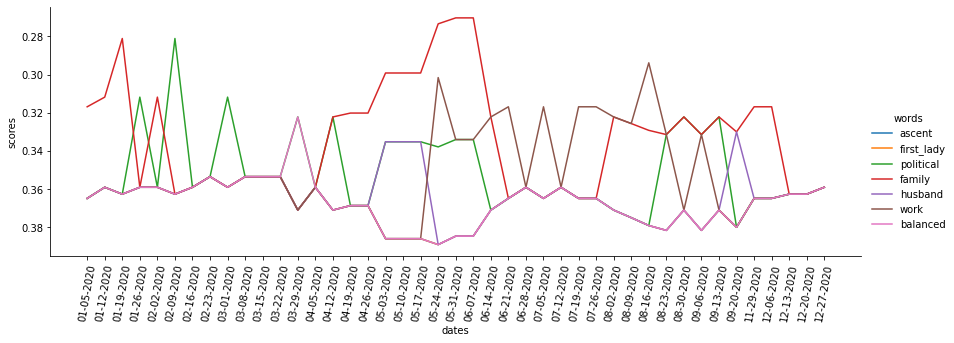

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.relplot(data=becoming_result, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

<h3>Prune Some More</h3>

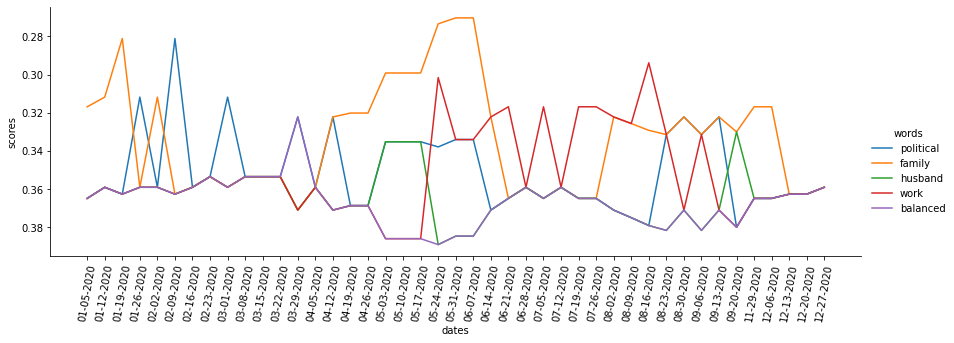

In [23]:
#political = becoming_2020.loc[becoming_2020['words'] == 'political']
#family = becoming_2020.loc[becoming_2020['words'] == 'family']
#husband = becoming_2020.loc[becoming_2020['words'] == 'husband']
#work = becoming_2020.loc[becoming_2020['words'] == 'work']
#balanced = becoming_2020.loc[becoming_2020['words'] == 'balanced']
becoming_result2 = pd.concat([political, family, husband, work, balanced], ignore_index=False, sort=True)
sns.relplot(data=becoming_result2, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

<h3>Compare Token Data Scored with Top Ten Best Sellers Ranked</h3>
<p>Observing the tokens commonly occurring most in BECOMING and the rank of BECOMING, it seems like "family" is a keyword that is the most commonly occurring word in January and May/June in which BECOMING reached its highest rank as best seller in 2020.<br>Another interesting observation is that the keyword "balanced" occurs as the most unique word to BECOMING in contrast to other books within the weeks within January, May/June, and September where BECOMING ranks highest as best seller of 2020, too.<br>Therefore, it seems as though a mixture of ingredients between commonly discussed and relevant topics and unique topics such as family in general and the focus of balancing that of family and life comprise the attributes of BECOMING as a best seller of 2020.</p> 

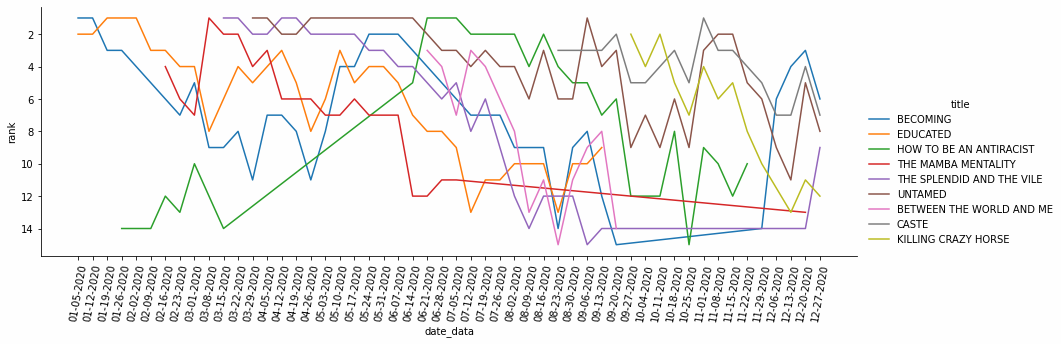

<h3>Extract The Data for The Book HOW TO BE AN ANTIRACIST</h3>

In [24]:
bestsellers_how_to_be_an_antiracist = []
for i in bestsellers:
    for k in i:
        if k[7] == "HOW TO BE AN ANTIRACIST":
            bestsellers_how_to_be_an_antiracist.append(k)
print(bestsellers_how_to_be_an_antiracist) 

[['1-26-2020', 'January 26, 2020', 1, 'January', '26', '2020', '7', 'HOW TO BE AN ANTIRACIST', 'Ibram X. Kendi', 'One World', 'A primer for creating a more just and equitable society through identifying and opposing racism.', '14', 'https://www.nytimes.com/books/best-sellers/2020/01/26/hardcover-nonfiction#QmVzdFNlbGxlckJvb2s6MDUyNTUwOTI4My05NzgwNTI1NTA5Mjg4', None, 'January 11, 2020', {'creating': 0.3535533905932738, 'equitable': 0.3535533905932738, 'identifying': 0.3535533905932738, 'just': 0.3535533905932738, 'opposing': 0.3535533905932738, 'primer': 0.3535533905932738, 'racism': 0.3535533905932738, 'society': 0.3535533905932738}, {'creating': 0.3535533905932738, 'equitable': 0.3535533905932738, 'identifying': 0.3535533905932738, 'just': 0.3535533905932738, 'opposing': 0.3535533905932738, 'primer': 0.3535533905932738, 'racism': 0.3535533905932738, 'society': 0.3535533905932738}], ['2-9-2020', 'February 9, 2020', 2, 'February', '9', '2020', '8', 'HOW TO BE AN ANTIRACIST', 'Ibram X. K

<h3>Prepare Data for A Data Frame for The Book HOW TO BE AN ANTIRACIST.</h3>

In [25]:
how_to_be_an_antiracist = []
for i in bestsellers_how_to_be_an_antiracist:    
    x_keys = list(i[15].keys())
    x_values = list(i[15].values())
    #print(x_keys)
    #print(x_values)
    for k in range(len(x_keys)):
        #print(k)
        #print(x_keys[k])
        #print(x_values[k])
        x = []
        x.append(i[0])
        x.append(x_keys[k])
        x.append(x_values[k])
        how_to_be_an_antiracist.append(x)
print(how_to_be_an_antiracist)

[['1-26-2020', 'creating', 0.3535533905932738], ['1-26-2020', 'equitable', 0.3535533905932738], ['1-26-2020', 'identifying', 0.3535533905932738], ['1-26-2020', 'just', 0.3535533905932738], ['1-26-2020', 'opposing', 0.3535533905932738], ['1-26-2020', 'primer', 0.3535533905932738], ['1-26-2020', 'racism', 0.3535533905932738], ['1-26-2020', 'society', 0.3535533905932738], ['2-9-2020', 'creating', 0.3535533905932738], ['2-9-2020', 'equitable', 0.3535533905932738], ['2-9-2020', 'identifying', 0.3535533905932738], ['2-9-2020', 'just', 0.3535533905932738], ['2-9-2020', 'opposing', 0.3535533905932738], ['2-9-2020', 'primer', 0.3535533905932738], ['2-9-2020', 'racism', 0.3535533905932738], ['2-9-2020', 'society', 0.3535533905932738], ['2-16-2020', 'creating', 0.3535533905932738], ['2-16-2020', 'equitable', 0.3535533905932738], ['2-16-2020', 'identifying', 0.3535533905932738], ['2-16-2020', 'just', 0.3535533905932738], ['2-16-2020', 'opposing', 0.3535533905932738], ['2-16-2020', 'primer', 0.3535

<h3>Create A Data Frame for The Book HOW TO BE AN ANTIRACIST</h3>

In [26]:
import pandas as pd
columns=["dates", "words", "scores"]
how_to_be_an_antiracist_2020 = pd.DataFrame(how_to_be_an_antiracist, columns = columns)
pd.set_option("display.max_rows", None, "display.max_columns", None)
how_to_be_an_antiracist_2020

,dates,words,scores
0,1-26-2020,creating,0.353553
1,1-26-2020,equitable,0.353553
2,1-26-2020,identifying,0.353553
3,1-26-2020,just,0.353553
4,1-26-2020,opposing,0.353553
5,1-26-2020,primer,0.353553
6,1-26-2020,racism,0.353553
7,1-26-2020,society,0.353553
8,2-9-2020,creating,0.353553
9,2-9-2020,equitable,0.353553


<h3>Format The Date</h3>

In [27]:
how_to_be_an_antiracist_2020['dates'] = pd.to_datetime(how_to_be_an_antiracist_2020['dates'])
how_to_be_an_antiracist_2020['dates'] = how_to_be_an_antiracist_2020['dates'].dt.strftime('%m-%d-%Y')
how_to_be_an_antiracist_2020 = how_to_be_an_antiracist_2020.sort_values(by = 'dates')

<h3>Prune Keywords</h3>

In [28]:
equitable = how_to_be_an_antiracist_2020.loc[how_to_be_an_antiracist_2020['words'] == 'equitable']
just = how_to_be_an_antiracist_2020.loc[how_to_be_an_antiracist_2020['words'] == 'just']
racism = how_to_be_an_antiracist_2020.loc[how_to_be_an_antiracist_2020['words'] == 'racism']
society = how_to_be_an_antiracist_2020.loc[how_to_be_an_antiracist_2020['words'] == 'society']
opposing = how_to_be_an_antiracist_2020.loc[how_to_be_an_antiracist_2020['words'] == 'opposing']
how_to_be_an_antiracist_result = pd.concat([equitable, just, racism, society, opposing], ignore_index=False, sort=True)

<h3>Plot Keywords by TF-IDF Scores and Dates to Have Occurred on Best Sellers List</h3>
<p>A positive score indicates that a word is unique to that book, and a negative score indicates that a word commonly occurs among all fifteen books on the NY Times best sellers list of a given week NY Times publishes a new list of best sellers on their website. The y-axis is inverted in the line graph to show which words are common and central among the best sellers of that week.</p>

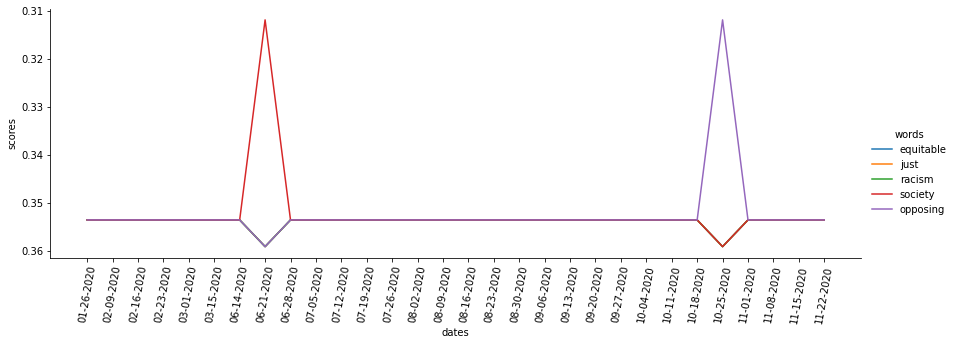

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.relplot(data=how_to_be_an_antiracist_result, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

<h3>Prune Some More</h3>

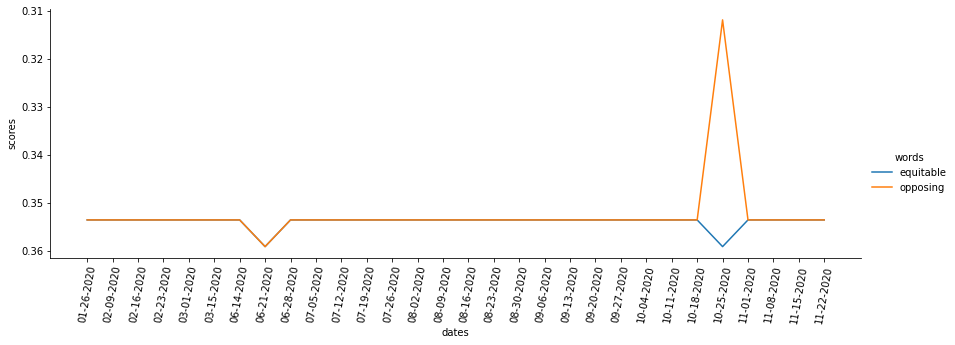

In [33]:
how_to_be_an_antiracist_result2 = pd.concat([equitable, opposing], ignore_index=False, sort=True)
sns.relplot(data=how_to_be_an_antiracist_result2, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

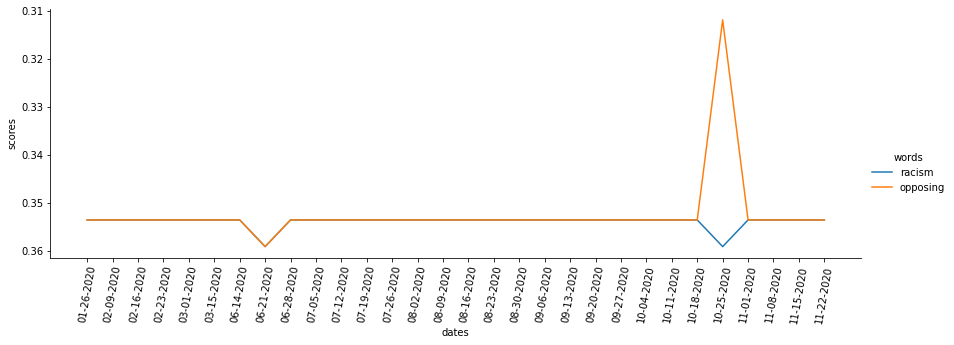

In [32]:
how_to_be_an_antiracist_result3 = pd.concat([racism, opposing], ignore_index=False, sort=True)
sns.relplot(data=how_to_be_an_antiracist_result3, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

<h3>Prune Some More</h3>
<p>The tokens "society" and "opposing" seem to occur across the corpus in contrast to other tokens. Though the other tokens occur uniquely June 21st and October 25th, "society" and "opposing" are used commonly, and equally, among other books those weeks.</p>

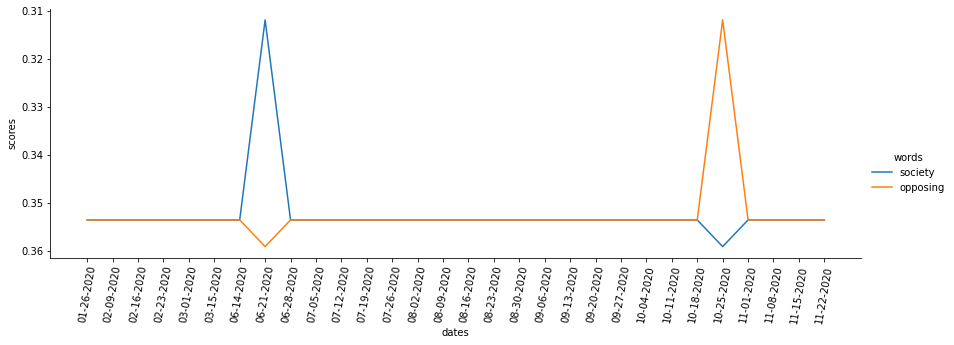

In [34]:
how_to_be_an_antiracist_result4 = pd.concat([society, opposing], ignore_index=False, sort=True)
sns.relplot(data=how_to_be_an_antiracist_result4, x="dates", y="scores", hue="words", kind="line", height=4, aspect=3)
plt.xticks(rotation=80);
plt.gca().invert_yaxis()

<h3>Compare Token Data Scored with Top Ten Best Sellers Ranked</h3>
<p>Observing the most common tokens occurring across other books besides HOW TO BE AN ANTIRACIST are "society" and "opposing" in which both have inverse characteristics from each other, "society" occurring across other books as a commonly discussed topic and "opposing" occurring uniquely to HOW TO BE AN ANTIRACIST prominently in the week around June 21st. However, an opposite characteristic is observed in the week around October 25th when "society" occurred uniquely to HOW TO BE AN ANTIRACIST, and "opposing" occurred as a common token among other books around the week of October 25th.<br>Interestingly, there is some flucuation in rank around October 25th, whereas HOW TO BE AN ANTIRACIST reached its highest rank around June 21st. The point that is being is observed is that these tokens behave as attributes in association to the rank of the book from a glance.</p>

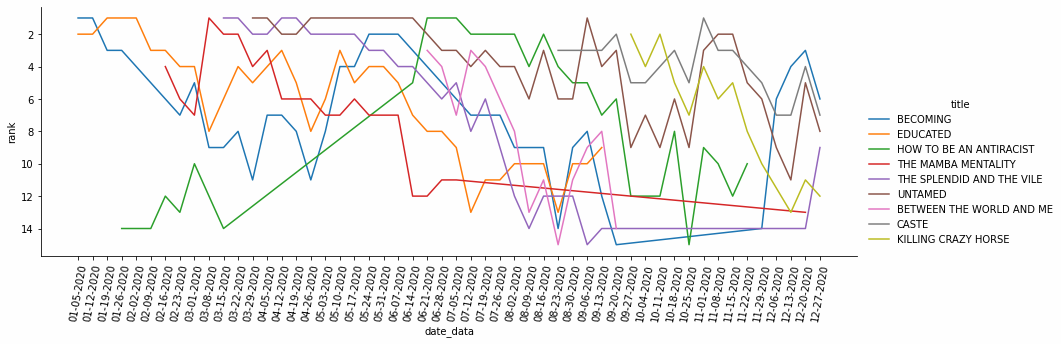